# Dificuldades, Decisões e Arquitetura
A parte mais desafiadora de se desenvolver o coletor foi de tratar certas excessões que nem sempre são claras. Ao pensar na coleta é importante manter atenção à detalhes como repetição de links e páginas. Esses problemas não ocorrem em uma coleta ideal, mas as coisas não são perfeitas e os links podem entrar em loop. A parte complexa desses problemas é que eles não se manifestam como erro sintático e, portanto, é muito mais difícil identificar o local adequado para tratá-los. Vale lembrar que se o tratamento for feito de forma indevida podemos obter resultados inesperados na coleta.

A principal decisão sobre esse coletor foi o de aproveitar ao máximo os recursos de dicionário para Python. Em outras linguagens poderia ser interessantes fazer uso de árvores, listas encadeadas, etc. para melhor lidar com os resultados. Porém, como a implementação de dicionários já está consolidada no Python, viu-se interessante usar ela para simplificar a abstração. Não só os dicionários foram um agente facilitador, mas as bibliotecas para tratamento de url e multithread também foram fundamentais para obter uma solução mais clara, abstraindo detalhes desnecessários.

# URL's acessadas
- PORTAL UOL. URL: https://www.uol.com.br. Último acesso em: 12/07/21.
- PORTAL UAI. URL: https://www.uai.com.br. Último acesso em: 12/07/21.
- PORTAL TERRA. URL: https://www.terra.com.br. Último acessso em: 12/07/21.
- JORNAL BBC. URL: https://www.bbc.com. Último acesso em: 12/07/21.
- PORTAL G1. URL: https://www.g1.globo.com. Último acesso em: 12/07/21.
- PORTAL TECMUNDO. URL: https://www.tecmundo.com.br. Último acesso em:12/07/21.
- PORTAL OLHARDIGITAL. URL: https://www.olhardigital.com.br. Último acesso em: 12/07/21.
- PORTAL ESTADÃO. URL: https://www.estadao.com.br. Último acesso em: 12/07/21.
- PORTAL ESTADO DE MINAS. URL: https://www.em.com.br. Último acesso em: 12/07/21.

# Critérios e Protocolos
O coletor precisa atender boas condutas para solicitar as páginas aos servidores. Para atender a essa política de boa navegação, pode-se elencar o método `get_next_url` da classe `Scheduler` no arquivo `scheduler.py`. Nele é possível encontrar o comando `sleep()` tendo como parâmetro uma constante de tempo que obedece aos protocolos de novas solicitações. Esse tipo de parada evita sobrecarregar o mesmo servidor. 

In [17]:
# ...
TIME_LIMIT_BETWEEN_REQUESTS = 20
# ...
def get_next_url(self) -> tuple:
        """
        Obtém uma nova URL por meio da fila. Essa URL é removida da fila.
        Logo após, caso o servidor não tenha mais URLs, o mesmo também é removido.
        """
        for domain in self.dic_url_per_domain.keys():
            if domain.is_accessible():
                # Não extraia self.dic_url_per_domain[domain] para uma variável, pois essas modificações devem ser
                # feitas por referência
                if len(self.dic_url_per_domain[domain]) > 0:
                    self.__acess_domain(domain)
                    return self.dic_url_per_domain[domain].pop(0)
        sleep(Scheduler.TIME_LIMIT_BETWEEN_REQUESTS)
        return None, None
# ...

Pensando ainda na política de comportamento, podemos observar no método `request_url` da classe `PageFetcher` no arquivo `page_fetcher.py` que o User Agent é identificado por uma constante da classe e ela é uma string com o termo `Bot`. Isso permite a identificação correta do coletor ao fazer as solicitações aos servidores.

In [18]:
# ...
USER_AGENT = 'amarelaoBot'
# ...
def request_url(self, obj_url: ParseResult):
        """
            Faz a requisição e retorna o conteúdo em binário da URL passada como parametro

            obj_url: Instancia da classe ParseResult com a URL a ser requisitada.
        """
        response = requests.get(url=obj_url.geturl(), headers={
                                'User-Agent': PageFetcher.USER_AGENT})
        return response.content if 'text/html' in response.headers['Content-Type'] else None
# ...

NameError: name 'ParseResult' is not defined

# impacto na velocidade de coleta
- quantidade de páginas por segundo
- threads de 10 a 100
- crescendo de 20 em 20 threads
- coletanto sempre 100 páginas
- recomendado usar: **seaborn**
> gerar gráfico


In [2]:
#VARIÁVEIS PADRÕES
import time
from multiprocessing import Process
from urllib.parse import urlparse
from crawler.page_fetcher import PageFetcher
from crawler.scheduler import Scheduler
depth_limit = 10  # limite de profundidade
page_limit = 100  # limite das páginas
tempos = [] #onde serão armazenados os tempos

In [3]:
#O CÓDIGO NÃO FOI GERADO EM FOR PARA EVITAR PROBLEMAS DE SOLICITAÇÕES E/OU QUESTÕES DE TEMPO DE TESTES
def test():
    inicio = time.time()  # inicio do tempo execução
    sites = ('https://www.uol.com.br', 'https://www.uai.com.br', 'https://www.terra.com.br', 'https://www.bbc.com',
             'https://www.g1.globo.com', 'https://www.tecmundo.com.br', 'https://www.olhardigital.com.br',
             'https://www.estadao.com.br', 'https://www.em.com.br')
    sites_parsed = [urlparse(site) for site in sites]
    escalonador = Scheduler('amarelaoBot', page_limit, depth_limit, sites_parsed)
    # Scheduler(self, str_usr_agent, int_page_limit, int_depth_limit, arr_urls_seeds):

    # instanciando o array de page fetcher
    page_fetchers = [PageFetcher(escalonador) for _ in range(10)]

    # inicializando cada um dos processos
    processos = []
    for fetcher in page_fetchers:
        p = Process(target=fetcher.run())
        p.start()
        processos.append(p)

    # Finalizando os processos
    for processo in processos:
        processo.join()
    fim = time.time()
    tempo_final = fim-inicio
    print(f'Tempo gasto: {tempo_final}')
    tempos.append(tempo_final)
    

if __name__ == '__main__':
    test()

URL[1]: https://www.uol.com.br/
URL[2]: https://batepapo.uol.com.br/
URL[3]: https://meunegocio.uol.com.br/?utm_source=uol.com.br&utm_medium=barrauol&utm_campaign=linkfixo-barrauol-umn&utm_term=barrauol-umn&utm_content=barrauol-umn
URL[4]: https://www.passeidireto.com/?utm_source=uol.com.br&utm_medium=barra-uol
URL[5]: https://play.uol.com.br/?utm_source=uol.com.br&utm_medium=barrauol&utm_campaign=linkfixo_barrauol&utm_term=barrauol-uolplay&utm_content=barrauol
URL[6]: https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:0;creative:barrauol;thm:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/
URL[7]: https://email.uol.com.br/
URL[8]: https://sac.uol.com.br/#/
URL[9]: https://www.uol.com.br/
URL[10]: https://economia.uol.com.br/cotacoes/cambio/
URL[11]: https://economia.uol.com.br/cotacoes/cambio/euro-uniao-europeia/
URL[12]: https://clicklogger.rm.uol.com.br/?prd=11&grp=src:13;chn:539;cpg:linkfixo_menu;creative:assine&msr=Cliques%20de%20Or

Tempo gasto: 3.7798421382904053


In [4]:
def test():
    inicio = time.time()  # inicio do tempo execução
    sites = ('https://www.uol.com.br', 'https://www.uai.com.br', 'https://www.terra.com.br', 'https://www.bbc.com',
             'https://www.g1.globo.com', 'https://www.tecmundo.com.br', 'https://www.olhardigital.com.br',
             'https://www.estadao.com.br', 'https://www.em.com.br')
    sites_parsed = [urlparse(site) for site in sites]
    escalonador = Scheduler('amarelaoBot', page_limit, depth_limit, sites_parsed)
    # Scheduler(self, str_usr_agent, int_page_limit, int_depth_limit, arr_urls_seeds):

    # instanciando o array de page fetcher
    page_fetchers = [PageFetcher(escalonador) for _ in range(30)]

    # inicializando cada um dos processos
    processos = []
    for fetcher in page_fetchers:
        p = Process(target=fetcher.run())
        p.start()
        processos.append(p)

    # Finalizando os processos
    for processo in processos:
        processo.join()
    fim = time.time()
    tempo_final = fim-inicio
    print(f'Tempo gasto: {tempo_final}')
    tempos.append(tempo_final)

if __name__ == '__main__':
    test()

ConnectionError: HTTPSConnectionPool(host='www.uol.com.br', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7efe23090e50>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [5]:
def test():
    inicio = time.time()  # inicio do tempo execução
    sites = ('https://www.uol.com.br', 'https://www.uai.com.br', 'https://www.terra.com.br', 'https://www.bbc.com',
             'https://www.g1.globo.com', 'https://www.tecmundo.com.br', 'https://www.olhardigital.com.br',
             'https://www.estadao.com.br', 'https://www.em.com.br')
    sites_parsed = [urlparse(site) for site in sites]
    escalonador = Scheduler('amarelaoBot', page_limit, depth_limit, sites_parsed)
    # Scheduler(self, str_usr_agent, int_page_limit, int_depth_limit, arr_urls_seeds):

    # instanciando o array de page fetcher
    page_fetchers = [PageFetcher(escalonador) for _ in range(50)]

    # inicializando cada um dos processos
    processos = []
    for fetcher in page_fetchers:
        p = Process(target=fetcher.run())
        p.start()
        processos.append(p)

    # Finalizando os processos
    for processo in processos:
        processo.join()
    fim = time.time()
    tempo_final = fim-inicio
    print(f'Tempo gasto: {tempo_final}')
    tempos.append(tempo_final)

if __name__ == '__main__':
    test()

URL[1]: https://www.uol.com.br/
URL[2]: https://batepapo.uol.com.br/
URL[3]: https://meunegocio.uol.com.br/?utm_source=uol.com.br&utm_medium=barrauol&utm_campaign=linkfixo-barrauol-umn&utm_term=barrauol-umn&utm_content=barrauol-umn
URL[4]: https://www.passeidireto.com/?utm_source=uol.com.br&utm_medium=barra-uol
URL[5]: https://play.uol.com.br/?utm_source=uol.com.br&utm_medium=barrauol&utm_campaign=linkfixo_barrauol&utm_term=barrauol-uolplay&utm_content=barrauol
URL[6]: https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:0;creative:barrauol;thm:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/
URL[7]: https://email.uol.com.br/
URL[8]: https://sac.uol.com.br/#/
URL[9]: https://www.uol.com.br/
URL[10]: https://economia.uol.com.br/cotacoes/cambio/
URL[11]: https://economia.uol.com.br/cotacoes/cambio/euro-uniao-europeia/
URL[12]: https://clicklogger.rm.uol.com.br/?prd=11&grp=src:13;chn:539;cpg:linkfixo_menu;creative:assine&msr=Cliques%20de%20Or

Tempo gasto: 6.00540566444397


In [6]:
def test():
    inicio = time.time()  # inicio do tempo execução
    sites = ('https://www.uol.com.br', 'https://www.uai.com.br', 'https://www.terra.com.br', 'https://www.bbc.com',
             'https://www.g1.globo.com', 'https://www.tecmundo.com.br', 'https://www.olhardigital.com.br',
             'https://www.estadao.com.br', 'https://www.em.com.br')
    sites_parsed = [urlparse(site) for site in sites]
    escalonador = Scheduler('amarelaoBot', page_limit, depth_limit, sites_parsed)
    # Scheduler(self, str_usr_agent, int_page_limit, int_depth_limit, arr_urls_seeds):

    # instanciando o array de page fetcher
    page_fetchers = [PageFetcher(escalonador) for _ in range(70)]

    # inicializando cada um dos processos
    processos = []
    for fetcher in page_fetchers:
        p = Process(target=fetcher.run())
        p.start()
        processos.append(p)

    # Finalizando os processos
    for processo in processos:
        processo.join()
    fim = time.time()
    tempo_final = fim-inicio
    print(f'Tempo gasto: {tempo_final}')
    tempos.append(tempo_final)

if __name__ == '__main__':
    test()

URL[1]: https://www.uol.com.br/
URL[2]: https://batepapo.uol.com.br/
URL[3]: https://meunegocio.uol.com.br/?utm_source=uol.com.br&utm_medium=barrauol&utm_campaign=linkfixo-barrauol-umn&utm_term=barrauol-umn&utm_content=barrauol-umn
URL[4]: https://www.passeidireto.com/?utm_source=uol.com.br&utm_medium=barra-uol
URL[5]: https://play.uol.com.br/?utm_source=uol.com.br&utm_medium=barrauol&utm_campaign=linkfixo_barrauol&utm_term=barrauol-uolplay&utm_content=barrauol
URL[6]: https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:0;creative:barrauol;thm:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/
URL[7]: https://email.uol.com.br/
URL[8]: https://sac.uol.com.br/#/
URL[9]: https://www.uol.com.br/
URL[10]: https://economia.uol.com.br/cotacoes/cambio/
URL[11]: https://economia.uol.com.br/cotacoes/cambio/euro-uniao-europeia/
URL[12]: https://clicklogger.rm.uol.com.br/?prd=11&grp=src:13;chn:539;cpg:linkfixo_menu;creative:assine&msr=Cliques%20de%20Or

Tempo gasto: 0.7266926765441895


In [7]:
def test():
    inicio = time.time()  # inicio do tempo execução
    sites = ('https://www.uol.com.br', 'https://www.uai.com.br', 'https://www.terra.com.br', 'https://www.bbc.com',
             'https://www.g1.globo.com', 'https://www.tecmundo.com.br', 'https://www.olhardigital.com.br',
             'https://www.estadao.com.br', 'https://www.em.com.br')
    sites_parsed = [urlparse(site) for site in sites]
    escalonador = Scheduler('amarelaoBot', page_limit, depth_limit, sites_parsed)
    # Scheduler(self, str_usr_agent, int_page_limit, int_depth_limit, arr_urls_seeds):

    # instanciando o array de page fetcher
    page_fetchers = [PageFetcher(escalonador) for _ in range(90)]

    # inicializando cada um dos processos
    processos = []
    for fetcher in page_fetchers:
        p = Process(target=fetcher.run())
        p.start()
        processos.append(p)

    # Finalizando os processos
    for processo in processos:
        processo.join()
    fim = time.time()
    tempo_final = fim-inicio
    print(f'Tempo gasto: {tempo_final}')
    tempos.append(tempo_final)

if __name__ == '__main__':
    test()

ConnectionError: HTTPSConnectionPool(host='www.uol.com.br', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f06682a4f70>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [5]:
def test():
    inicio = time.time()  # inicio do tempo execução
    sites = ('https://www.uol.com.br', 'https://www.uai.com.br', 'https://www.terra.com.br', 'https://www.bbc.com',
             'https://www.g1.globo.com', 'https://www.tecmundo.com.br', 'https://www.olhardigital.com.br',
             'https://www.estadao.com.br', 'https://www.em.com.br')
    sites_parsed = [urlparse(site) for site in sites]
    escalonador = Scheduler('amarelaoBot', page_limit, depth_limit, sites_parsed)
    # Scheduler(self, str_usr_agent, int_page_limit, int_depth_limit, arr_urls_seeds):

    # instanciando o array de page fetcher
    page_fetchers = [PageFetcher(escalonador) for _ in range(110)]

    # inicializando cada um dos processos
    processos = []
    for fetcher in page_fetchers:
        p = Process(target=fetcher.run())
        p.start()
        processos.append(p)

    # Finalizando os processos
    for processo in processos:
        processo.join()
    fim = time.time()
    tempo_final = fim-inicio
    print(f'Tempo gasto: {tempo_final}')
    tempos.append(tempo_final)

if __name__ == '__main__':
    test()

URL[1]: https://www.uol.com.br/
URL[2]: https://batepapo.uol.com.br/
URL[3]: https://meunegocio.uol.com.br/?utm_source=uol.com.br&utm_medium=barrauol&utm_campaign=linkfixo-barrauol-umn&utm_term=barrauol-umn&utm_content=barrauol-umn
URL[4]: https://www.passeidireto.com/?utm_source=uol.com.br&utm_medium=barra-uol
URL[5]: https://play.uol.com.br/?utm_source=uol.com.br&utm_medium=barrauol&utm_campaign=linkfixo_barrauol&utm_term=barrauol-uolplay&utm_content=barrauol
URL[6]: https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:0;creative:barrauol;thm:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/
URL[7]: https://email.uol.com.br/
URL[8]: https://sac.uol.com.br/#/
URL[9]: https://www.uol.com.br/
URL[10]: https://economia.uol.com.br/cotacoes/cambio/
URL[11]: https://economia.uol.com.br/cotacoes/cambio/euro-uniao-europeia/
URL[12]: https://clicklogger.rm.uol.com.br/?prd=11&grp=src:13;chn:539;cpg:linkfixo_menu;creative:assine&msr=Cliques%20de%20Or

Tempo gasto: 6.968072175979614


<AxesSubplot:xlabel='threads', ylabel='col2'>

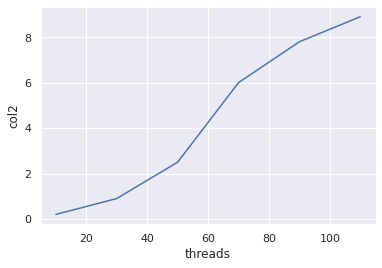

In [1]:
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")
d = {'threads': [10, 30,50,70,90,110], 'col2': tempos}
df = pd.DataFrame(data=d)

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="threads", y="col2",
             data=df)